In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras


# 로딩한 데이터에서 증강

In [2]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.cifar10.load_data()

print(raw_train_x.shape)
print(raw_train_y.shape)
print(raw_test_x.shape)
print(raw_test_y.shape)


train_x = raw_train_x
test_x = raw_test_x

train_y = raw_train_y
test_y = raw_test_y

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


9 truck


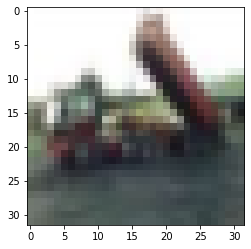

4 deer


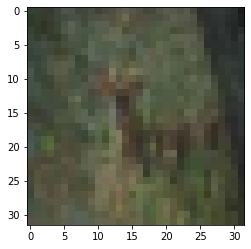

7 horse


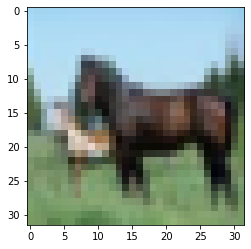

9 truck


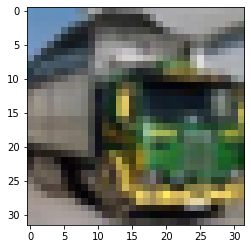

In [3]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

def show_sample(i):
  print(raw_train_y[i][0], labels[raw_train_y[i][0]])
  plt.imshow(raw_train_x[i])
  plt.show()

for i in [2, 10, 12, 14]:
  show_sample(i)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def my_preprocess(image):
  return image/255

BATCH_SIZE = 128

data_generator = ImageDataGenerator(
    rotation_range=10, # 0 ~ 180
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=my_preprocess
).flow(train_x, train_y, batch_size=BATCH_SIZE)

(128, 32, 32, 3)
(128, 1)


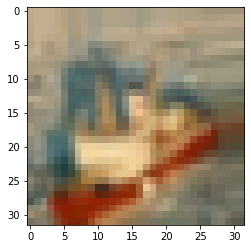

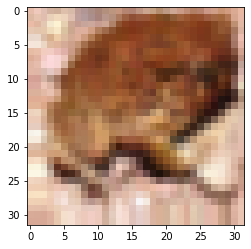

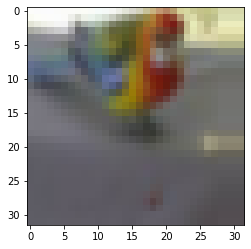

In [5]:
batch_x, batch_y = next(data_generator)
print(batch_x.shape)
print(batch_y.shape)

for i in range(3):
  plt.imshow(batch_x[i])
  plt.show()

# 파일 시스템에서 증강

In [6]:
!rm -rf dogs_prepared.tar.gz
!wget https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/data/dogs_prepared.tar.gz
!ls -al 

--2022-05-20 06:59:37--  https://raw.githubusercontent.com/medicieducation/trainingcourse/main/bigdata/deeplearning/material/deep_learning/data/dogs_prepared.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62898132 (60M) [application/octet-stream]
Saving to: ‘dogs_prepared.tar.gz’

dogs_prepared.tar.g 100%[===================>]  59.98M   128MB/s    in 0.5s    

2022-05-20 06:59:38 (128 MB/s) - ‘dogs_prepared.tar.gz’ saved [62898132/62898132]

total 61444
drwxr-xr-x 1 root root      4096 May 20 06:59 .
drwxr-xr-x 1 root root      4096 May 20 06:52 ..
drwxr-xr-x 4 root root      4096 May 17 13:38 .config
drwxr-xr-x 4  501 staff     4096 Jul 23  2019 dogs_prepared
-rw-r--r-- 1 root root  62898132 May 20 06:59 dogs_prepared.tar.gz
drwxr-xr-x 1 root root  

In [7]:
!rm -rf dogs_prepared
!tar xvfz dogs_prepared.tar.gz
!ls -al dogs_prepared

dogs_prepared/
dogs_prepared/._test
dogs_prepared/test/
dogs_prepared/train/
dogs_prepared/train/n02085620-Chihuahua/
dogs_prepared/train/n02085782-Japanese_spaniel/
dogs_prepared/train/n02085936-Maltese_dog/
dogs_prepared/train/n02086079-Pekinese/
dogs_prepared/train/n02086240-Shih-Tzu/
dogs_prepared/train/n02086646-Blenheim_spaniel/
dogs_prepared/train/n02086910-papillon/
dogs_prepared/train/n02087046-toy_terrier/
dogs_prepared/train/n02087394-Rhodesian_ridgeback/
dogs_prepared/train/n02088094-Afghan_hound/
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1003.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1007.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_1023.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10263.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10715.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10822.jpg
dogs_prepared/train/n02088094-Afghan_hound/n02088094_10832.jpg
dogs_prepared/train/n02088094-Afghan_hound/n020

In [8]:

import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

BATCH_SIZE = 128

data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=my_preprocess
).flow_from_directory(
      "dogs_prepared/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)


Found 1531 images belonging to 10 classes.


(128, 224, 224, 3)
(128,)


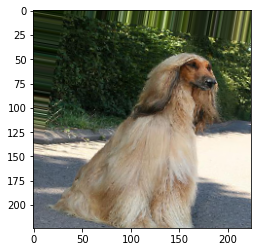

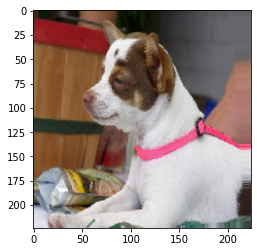

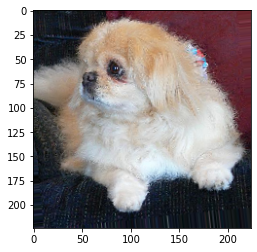

In [9]:
batch_x, batch_y = next(data_generator)
print(batch_x.shape)
print(batch_y.shape)

for i in range(3):
  plt.imshow(batch_x[i])
  plt.show()